In [16]:
! pip install opencv-python numpy tqdm matplotlib

In [17]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [18]:
REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                #print(f)
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        print(label, f, str(e))
                        pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:', dogsvcats.catcount, self.catcount)
        print('Dogs:', dogsvcats.dogcount, self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


In [19]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [20]:
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

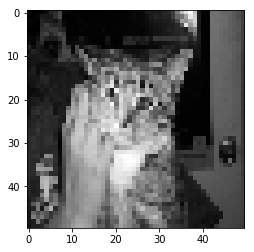

In [23]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")
plt.show()

In [22]:
print(y[0])

tensor([1., 0.])
